<a href="https://colab.research.google.com/github/Enriquea017/Regresi-n-No-Lineal/blob/main/Actividad2_regresi%C3%B3n_nolineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Carga de las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as special
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [ ]:

pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('hawaii_limpio_completo2.csv')


In [ ]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '', regex=False).astype(float) / 100
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '', regex=False).astype(float) / 100
df['host_is_superhost'] = df['host_is_superhost'].replace({'f': 0, 't': 1})

display(df[['host_response_rate', 'host_acceptance_rate', 'host_is_superhost']].head())

,host_response_rate,host_acceptance_rate,host_is_superhost
0,1.0,0.96,1
1,1.0,0.96,0
2,0.0,0.00,0
3,0.0,0.00,0
4,1.0,0.00,0


In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5269,https://www.airbnb.com/rooms/5269,20250306035046,2025-03-14,city scrape,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,"Waimea, HI","Lea, born and raised on the Island of Hawaii, ...",within an hour,1.0,0.96,1,https://a0.muscache.com/im/pictures/user/16ac6...,https://a0.muscache.com/im/pictures/user/16ac6...,Island of Hawaiʻi,3.0,6.0,"['email', 'phone']",t,t,Neighborhood highlights,South Kohala,Hawaii,20.02740,-155.70200,Entire rental unit,Entire home/apt,2,1,1,1,"[""Coffee maker"", ""Garden view"", ""Outdoor furni...",128.0,3,1125,3,3,1125,1125,3.0,1125.0,t,8,8,8,8,2025-03-14,40,6,1,0,6,36,4608.000000,2011-05-31,2025-02-25,4.78,4.88,4.55,4.95,4.85,5.00,4.85,119-269-5808-01R,f,3,3,0,0,0.24
1,5387,https://www.airbnb.com/rooms/5387,20250306035046,2025-03-15,city scrape,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,"Captain Cook, HI","Kona Hawaii,\n \n Ed is a Farmer/Designer \n\n...",within an hour,1.0,0.96,0,https://a0.muscache.com/im/pictures/user/b895b...,https://a0.muscache.com/im/pictures/user/b895b...,Kailua/Kona,2.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,South Kona,Hawaii,19.43081,-155.88069,Entire rental unit,Entire home/apt,2,1,0,2,"[""Garden view"", ""Cooking basics"", ""Wifi"", ""Ded...",97.0,5,60,5,5,1125,1125,5.0,1125.0,t,2,22,48,250,2025-03-15,231,13,0,207,14,130,12610.000000,2010-02-16,2025-01-14,4.67,4.69,4.42,4.85,4.88,4.74,4.78,TA-163-133-0304-01,t,2,2,0,0,1.26
2,5480,https://www.airbnb.com/rooms/5480,20250306035046,2025-03-14,city scrape,Isle Of You Naturally Farm Retreat,The Best Choice for your Clothing Optional Nud...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,"Pāhoa, HI","a decade ago, my husband bailed on the mainla...",Sin respuesta,0.0,0.00,0,https://a0.muscache.com/im/users/8145/profile_...,https://a0.muscache.com/im/users/8145/profile_...,Island of Hawaiʻi,3.0,3.0,"['email', 'phone']",t,f,Neighborhood highlights,Puna,Hawaii,19.44149,-154.91527,Private room in cabin,Private room,2,1,1,1,"[""Kitchen"", ""Host greets you"", ""Breakfast"", ""F...",117.0,2,60,2,2,60,60,2.0,60.0,t,30,60,90,365,2025-03-14,

In [ ]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       '

In [ ]:
#Definimos las ecuaciones que se usaran en los modelos
#Función Cuadratica
def  func1 (x, a, b, c):
     return a*x**2 + b*x + c

#Función exponencial
def func_exp(x, a, b, c):
    return a * np.exp(-b * x) + c

#Función inversa
def func_inverse(x, a):
    # Adding a small epsilon to avoid division by zero if x is 0
    return 1 / (a * x + 1e-9)

#Función senoidal
def func_sin(x, a, b):
    return a * np.sin(x) + b

#Función tangencial
def func_tan(x, a, b):
    return a * np.tan(x) + b

#Función Valor absoluto
def func_abs(x, a, b, c):
    return a * np.abs(x) + b * x + c

#Función cociente entre polinomios
def func_rational(x, a, b, c):
    # Adding a small epsilon to avoid division by zero if denominator is zero
    return (a * x**2 + b) / (c * x**2 + 1e-9)

#Función logaritmica
def func_log(x, a, b):
    # Adding a small epsilon to avoid log of zero or negative numbers
    return a * np.log(x + 1e-9) + b

#Función lineal con producto de coeficientes
# Note: This equation appears to be a linear function: y = (a+b+c)*x
# If you intended a different form, please clarify.
def func_linear_product(x, a, b, c):
    return (a + b + c) * x

#Función cuadrática inversa
def func_inverse_quadratic(x, a, b):
    # Adding a small epsilon to avoid division by zero
    return a / (b * x**2 + 1e-9)

#Función polinomial inversa
# Note: This equation appears to be a simple quadratic: y = (a/b)*x**2 + c*x
def func_inverse_polynomial(x, a, b, c):
    return (a / b) * x**2 + c * x

# Host_response_rate

In [ ]:
#Modelo 1
indep1 = df[['host_acceptance_rate']]
depen1 = df['host_response_rate']
x1= indep1
y1= depen1

In [ ]:
indep1_numeric = df['host_acceptance_rate'].values
depen1_numeric = df['host_response_rate'].values

parametros1, covs = curve_fit(func1, indep1_numeric, depen1_numeric)

print("Fitted parameters (a, b, c):", parametros1)

Fitted parameters (a, b, c): [-1.31477976  1.98599028  0.28542712]


In [ ]:
# Predicciones
y_pred1 = func1(x1, *parametros1)

/tmp/ipython-input-160142512.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x1, y1, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-160142512.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x1, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "red")


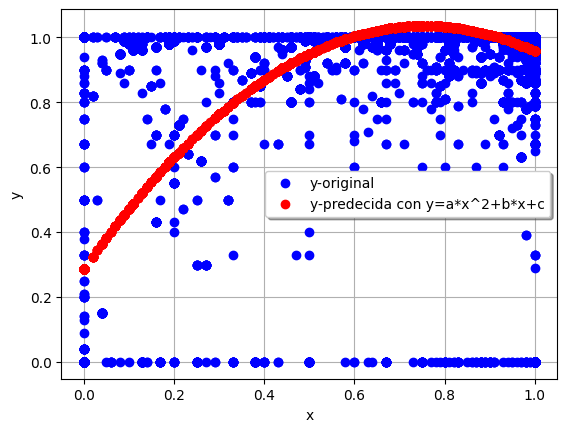

In [ ]:
#Graficamos las predicciones y los datos originales para realizar la comparación
plt.plot(x1, y1, 'bo', label="y-original", color= "blue")
plt.plot(x1, y_pred1,'bo', label="y-predecida con y=a*x^2+b*x+c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [ ]:
#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y1, y_pred1)
R2_Modelo1

0.4901303394039638

In [ ]:
#Calculamos el coeficiente de correlación del modelo
R1 = np.sqrt(R2_Modelo1)
R1

np.float64(0.7000930933839897)

/tmp/ipython-input-2143190871.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x1, y1, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-2143190871.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x1, y_pred2,'bo', label="y-predecida", color= "red")


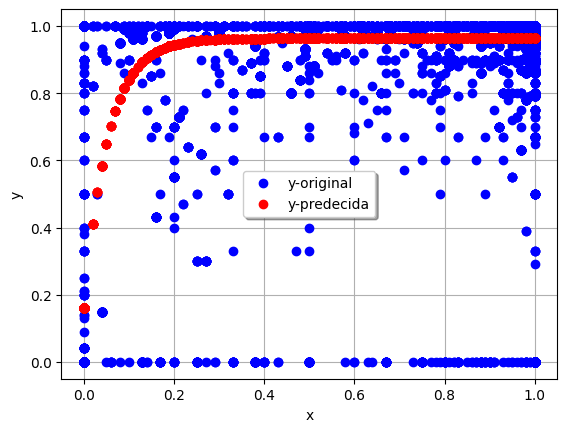

Fitted parameters (a, b, c): [-0.8020824  18.68601433  0.96301704]
R2: 0.5567394584458133
R: 0.7461497560448662


In [ ]:
#Modelo 2
parametros2, covs = curve_fit(func_exp, indep1_numeric, depen1_numeric)
y_pred2 = func_exp(x1, *parametros2)

plt.plot(x1, y1, 'bo', label="y-original", color= "blue")
plt.plot(x1, y_pred2,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

R2_Modelo2 = r2_score(y1, y_pred2)
R2 = np.sqrt(R2_Modelo2)


print("Fitted parameters (a, b, c):", parametros2)
print("R2:", R2_Modelo2)
print("R:", R2)


## Host acceptance rate


/tmp/ipython-input-3053875942.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x2, y2, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-3053875942.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x2, y_pred3,'bo', label="y-predecida", color= "red")


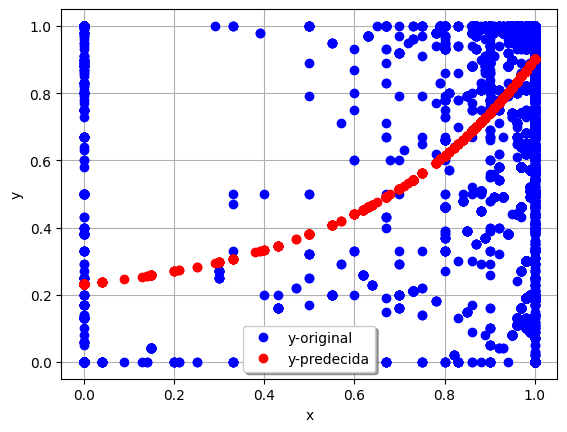

Fitted parameters (a, b, c): [ 0.05956341 -2.50794875  0.17128146]
R2: 0.3708329585569691
R: 0.6089605558301532


In [ ]:
#Modelo 1_2
indep2 = df['host_response_rate'].values
depen2 = df['host_acceptance_rate'].values
x2= indep2
y2= depen2

initial_guess = [0.1, 0.1, 0.1]

parametros3, covs = curve_fit(func_exp, indep2, depen2, p0=initial_guess)
y_pred3 = func_exp(x2, *parametros3)
R2_Modelo3 = r2_score(y2, y_pred3)
R3 = np.sqrt(R2_Modelo3)

plt.plot(x2, y2, 'bo', label="y-original", color= "blue")
plt.plot(x2, y_pred3,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print("Fitted parameters (a, b, c):", parametros3)
print("R2:", R2_Modelo3)
print("R:", R3)


/tmp/ipython-input-639310267.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x2, y2, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-639310267.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x2, y_pred4,'bo', label="y-predecida", color= "red")


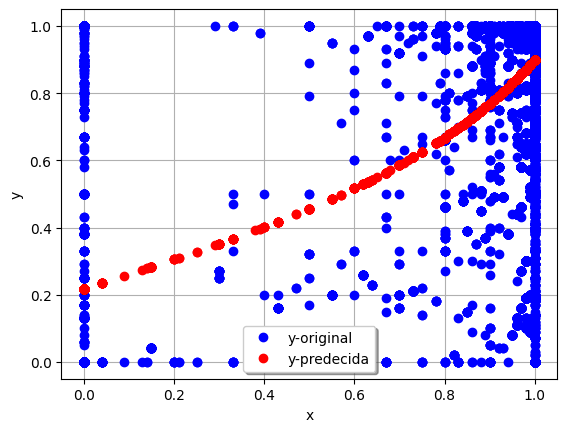

Fitted parameters (a, b, c): [0.43829405 0.21648474]
R2: 0.3700844083260021
R: 0.6083456322897388


In [ ]:

#Modelo 2_2
initial_guess = [0.1, 0.1]

parametros4, covs = curve_fit(func_tan, indep2, depen2, p0=initial_guess)
y_pred4 = func_tan(x2, *parametros4)
R2_Modelo4 = r2_score(y2, y_pred4)
R4 = np.sqrt(R2_Modelo4)

plt.plot(x2, y2, 'bo', label="y-original", color= "blue")
plt.plot(x2, y_pred4,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print("Fitted parameters (a, b, c):", parametros4)
print("R2:", R2_Modelo4)
print("R:", R4)

### Host_total_listing_count

/tmp/ipython-input-1625792816.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x3, y3, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-1625792816.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x3, y_pred5,'bo', label="y-predecida", color= "red")


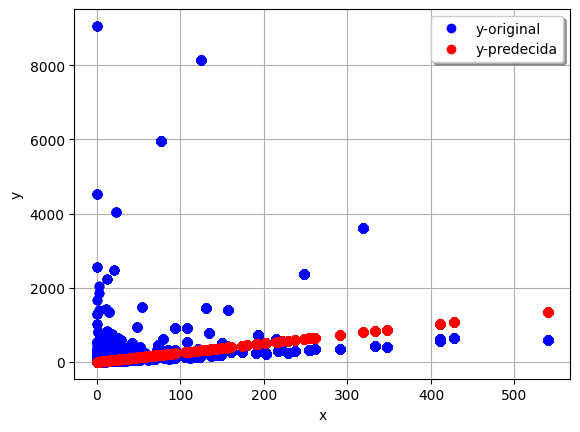

Fitted parameters (a, b, c): [14.97177167 -6.24143177 -6.24143177]
R2: 0.06326473531061749
R: 0.2515248204663259


In [ ]:
#Modelo 1_3
indep3 = df['calculated_host_listings_count_entire_homes'].values
depen3 = df['host_total_listings_count'].values
x3= indep3
y3= depen3

initial_guess = [0.1, 0.1, 0.1]

parametros5, covs = curve_fit(func_linear_product, indep3, depen3, p0=initial_guess)
y_pred5 = func_linear_product(x3, *parametros5)
R2_Modelo5 = r2_score(y3, y_pred5)
R5 = np.sqrt(R2_Modelo5)

plt.plot(x3, y3, 'bo', label="y-original", color= "blue")
plt.plot(x3, y_pred5,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print("Fitted parameters (a, b, c):", parametros5)
print("R2:", R2_Modelo5)
print("R:", R5)

/tmp/ipython-input-2109409558.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x3, y3, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-2109409558.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x3, y_pred6,'bo', label="y-predecida", color= "red")


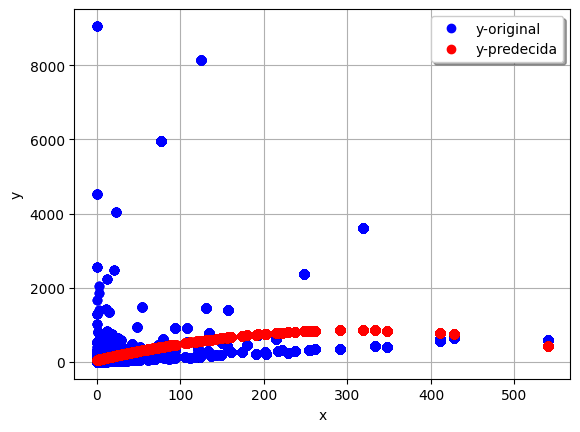

Fitted parameters (a, b, c): [-8.28050432e-03  5.14373727e+00  5.59974325e+01]
R2: 0.11181387921019692
R: 0.33438582387744387


In [ ]:
#Modelo 2_3
initial_guess = [0.1, 0.1, 0.1]

parametros6, covs = curve_fit(func1, indep3, depen3, p0=initial_guess)
y_pred6 = func1(x3, *parametros6)
R2_Modelo6 = r2_score(y3, y_pred6)
R6 = np.sqrt(R2_Modelo6)

plt.plot(x3, y3, 'bo', label="y-original", color= "blue")
plt.plot(x3, y_pred6,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print("Fitted parameters (a, b, c):", parametros6)
print("R2:", R2_Modelo6)
print("R:", R6)

## Acommodates

/tmp/ipython-input-1871089134.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x4, y4, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-1871089134.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x4, y_pred7,'bo', label="y-predecida", color= "red")


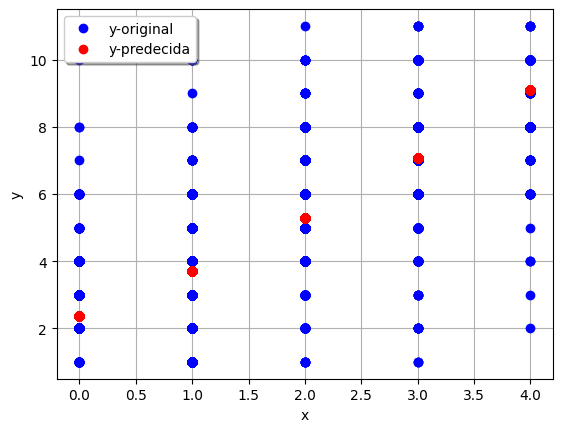

Fitted parameters (a, b, c): [0.11089063 1.23713873 2.35897171]
R2: 0.5734002585051605
R: 0.7572319713965863


In [ ]:
#Modelo 1_4
indep4 = df['bedrooms'].values
depen4 = df['accommodates'].values
x4= indep4
y4= depen4

initial_guess = [0.1, 0.1, 0.1]

parametros7, covs = curve_fit(func1, indep4, depen4, p0=initial_guess)
y_pred7 = func1(x4, *parametros7)
R2_Modelo7 = r2_score(y4, y_pred7)
R7 = np.sqrt(R2_Modelo7)

plt.plot(x4, y4, 'bo', label="y-original", color= "blue")
plt.plot(x4, y_pred7,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print("Fitted parameters (a, b, c):", parametros7)
print("R2:", R2_Modelo7)
print("R:", R7)

/tmp/ipython-input-1796875408.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x4, y4, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-1796875408.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x4, y_pred8,'bo', label="y-predecida", color= "red")


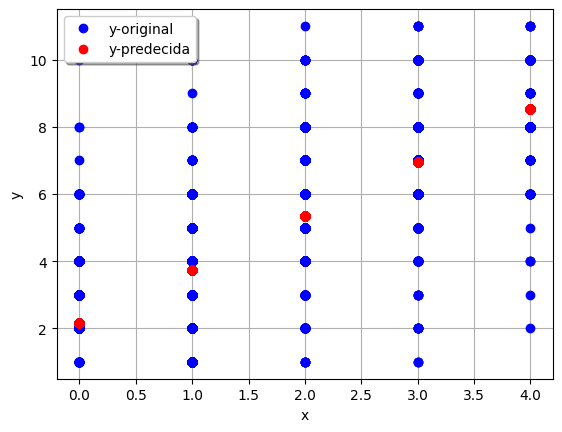

Fitted parameters (a, b, c): [-10.05980454  11.65632559   2.15075267]
R2: 0.5696273470346069
R: 0.7547366077212678


In [ ]:
#Modelo 2_4
initial_guess = [0.1, 0.1, 0.1]

parametros8, covs = curve_fit(func_abs, indep4, depen4, p0=initial_guess)
y_pred8 = func_abs(x4, *parametros8)
R2_Modelo8 = r2_score(y4, y_pred8)
R8 = np.sqrt(R2_Modelo8)

plt.plot(x4, y4, 'bo', label="y-original", color= "blue")
plt.plot(x4, y_pred8,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print("Fitted parameters (a, b, c):", parametros8)
print("R2:", R2_Modelo8)
print("R:", R8)

## reviews_per_month

/tmp/ipython-input-1600489285.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x5, y5, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-1600489285.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x5, y_pred9,'bo', label="y-predecida", color= "red")


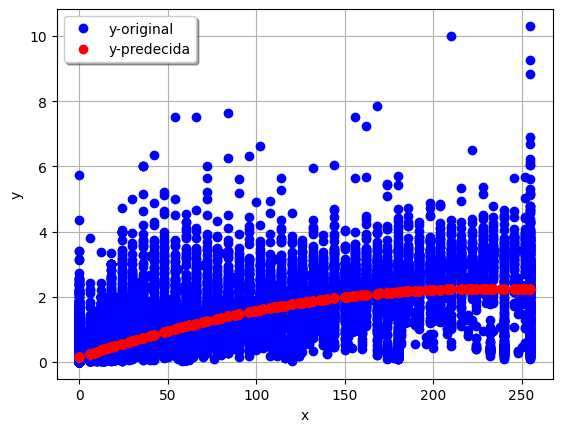

Fitted parameters (a, b, c): [-3.97160013e-05  1.83109558e-02  1.36610316e-01]
R2: 0.5801990928609415
R: 0.7617080102381368


In [ ]:
#Modelo 1_5
indep5 = df['estimated_occupancy_l365d'].values
depen5 = df['reviews_per_month'].values
x5= indep5
y5= depen5

initial_guess = [0.1, 0.1, 0.1]

parametros9, covs = curve_fit(func1, indep5, depen5, p0=initial_guess)
y_pred9 = func1(x5, *parametros9)
R2_Modelo9 = r2_score(y5, y_pred9)
R9 = np.sqrt(R2_Modelo9)

plt.plot(x5, y5, 'bo', label="y-original", color= "blue")
plt.plot(x5, y_pred9,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print("Fitted parameters (a, b, c):", parametros9)
print("R2:", R2_Modelo9)
print("R:", R9)

/tmp/ipython-input-2506908585.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x5, y5, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-2506908585.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x5, y_pred10,'bo', label="y-predecida", color= "red")


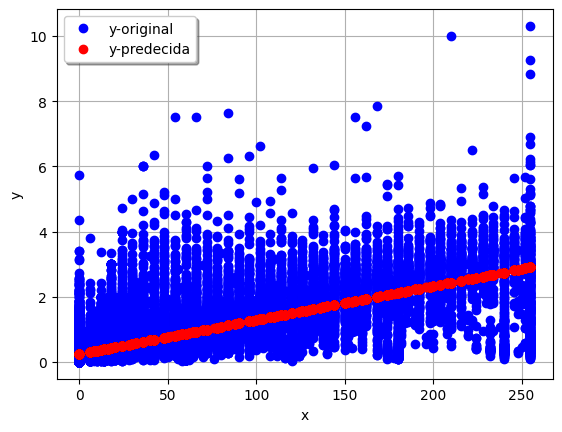

Fitted parameters (a, b, c): [10.00559479 -9.99517365  0.24229624]
R2: 0.5427979052191638
R: 0.7367481966175172


In [ ]:
########
#Modelo 2_5
initial_guess = [0.1, 0.1, 0.1]

parametros10, covs = curve_fit(func_abs, indep5, depen5, p0=initial_guess)
y_pred10 = func_abs(x5, *parametros10)
R2_Modelo10 = r2_score(y5, y_pred10)
R10 = np.sqrt(R2_Modelo10)

plt.plot(x5, y5, 'bo', label="y-original", color= "blue")
plt.plot(x5, y_pred10,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print("Fitted parameters (a, b, c):", parametros10)
print("R2:", R2_Modelo10)
print("R:", R10)

## Price

/tmp/ipython-input-1255315616.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x6, y6, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-1255315616.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x6, y_pred11,'bo', label="y-predecida", color= "red")


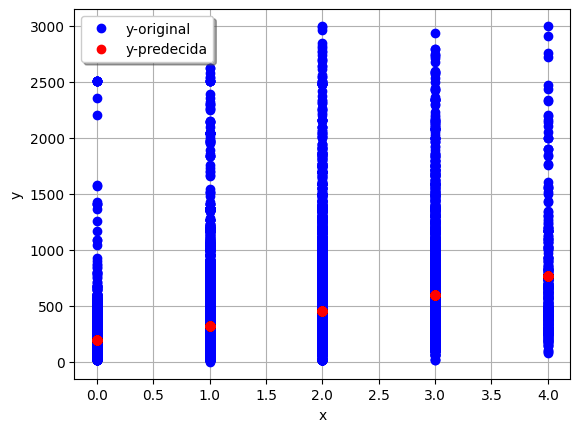

Fitted parameters (a, b, c): [  7.31639838 111.94823988 200.32502586]
R2: 0.12705066499550444
R: 0.3564416712387939


In [ ]:
########
#Modelo 1_6
indep6 = df['bedrooms'].values
depen6 = df['price'].values
x6= indep6
y6= depen6

initial_guess = [0.1, 0.1, 0.1]

parametros11, covs = curve_fit(func1, indep6, depen6, p0=initial_guess)
y_pred11 = func1(x6, *parametros11)
R2_Modelo11 = r2_score(y6, y_pred11)
R11 = np.sqrt(R2_Modelo11)

plt.plot(x6, y6, 'bo', label="y-original", color= "blue")
plt.plot(x6, y_pred11,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print("Fitted parameters (a, b, c):", parametros11)
print("R2:", R2_Modelo11)
print("R:", R11)

/tmp/ipython-input-361230316.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x6, y6, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-361230316.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x6, y_pred12,'bo', label="y-predecida", color= "red")


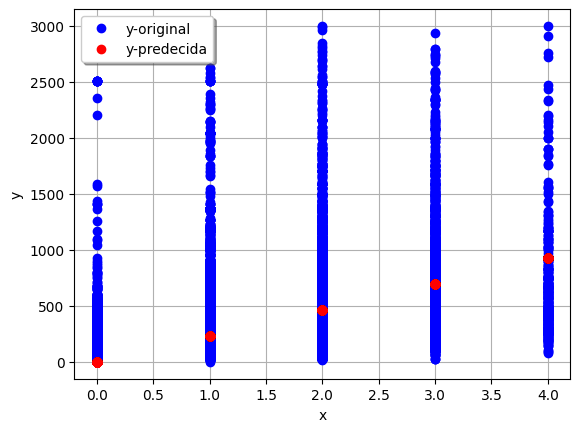

Fitted parameters (a, b, c): [133.87806968 133.87803112 -35.82698132]
R2: 0.0408550864645808
R: 0.2021264120905054


In [ ]:
########
#Modelo 2_6
initial_guess = [0.1, 0.1, 0.1]

parametros12, covs = curve_fit(func_linear_product, indep6, depen6, p0=initial_guess)
y_pred12 = func_linear_product(x6, *parametros12)
R2_Modelo12 = r2_score(y6, y_pred12)
R12 = np.sqrt(R2_Modelo12)

plt.plot(x6, y6, 'bo', label="y-original", color= "blue")
plt.plot(x6, y_pred12,'bo', label="y-predecida", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

print("Fitted parameters (a, b, c):", parametros12)
print("R2:", R2_Modelo12)
print("R:", R12)